In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataFile = '/home/yhy/Documents/sklt_analysis/data/sklt_Data1.txt'

name_arr =  ['time', 
'torso_x', 'torso_y', 'torso_z', 
'left_hip_x', 'left_hip_y', 'left_hip_z', 
'left_knee_x', 'left_knee_y', 'left_knee_z',
'left_foot_x', 'left_foot_y', 'left_foot_z', 
'right_hip_x', 'right_hip_y', 'right_hip_z', 
'right_knee_x', 'right_knee_y', 'right_knee_z', 
'right_foot_x', 'right_foot_y', 'right_foot_z']

rawData = pd.read_csv(dataFile, index_col = False, sep=' ',names = name_arr)


pd.options.display.float_format= '{:.4f}'.format

In [11]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 22 columns):
time            163 non-null float64
torso_x         163 non-null float64
torso_y         163 non-null float64
torso_z         163 non-null float64
left_hip_x      163 non-null float64
left_hip_y      163 non-null float64
left_hip_z      163 non-null float64
left_knee_x     163 non-null float64
left_knee_y     163 non-null float64
left_knee_z     163 non-null float64
left_foot_x     163 non-null float64
left_foot_y     163 non-null float64
left_foot_z     163 non-null float64
right_hip_x     163 non-null float64
right_hip_y     163 non-null float64
right_hip_z     163 non-null float64
right_knee_x    163 non-null float64
right_knee_y    163 non-null float64
right_knee_z    163 non-null float64
right_foot_x    163 non-null float64
right_foot_y    163 non-null float64
right_foot_z    163 non-null float64
dtypes: float64(22)
memory usage: 28.1 KB


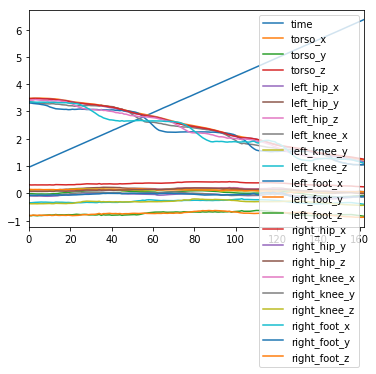

In [12]:
rawData.head(10)
rawData.plot()

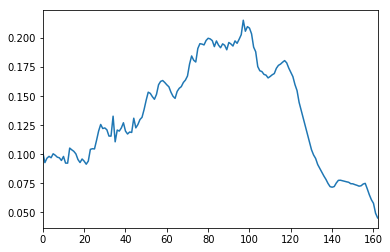

In [13]:
rawData["left_hip_z"].plot()

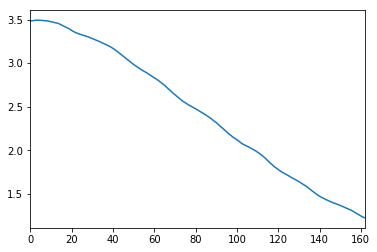

In [14]:
#time vs body_position
rawData["torso_x"].plot()
plt.show()

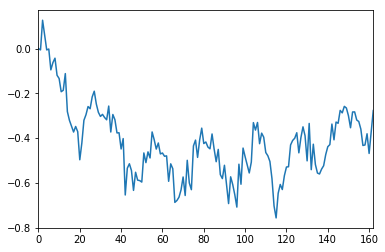

In [15]:
#Make Velocity of Torso

velocity_torso =  (rawData['torso_x'][1:].to_numpy() - rawData['torso_x'][:-1].to_numpy()) / (rawData['time'][1:].to_numpy() - rawData['time'][:-1].to_numpy())
velocity_torso = np.insert(velocity_torso,0,0) #insert '0' to array[0]

rawData["velocity_torso"] = velocity_torso
rawData["velocity_torso"].plot()
plt.show()

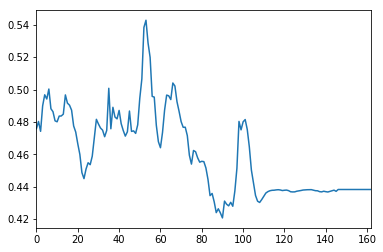

In [16]:
#Make Size_Of_left_shin

size_of_shin= np.sqrt((rawData['left_knee_x'] - rawData['left_foot_x'])**2 + (rawData['left_knee_y'] - rawData['left_foot_y'])**2 + (rawData['left_knee_z'] - rawData['left_foot_z'])**2 
                     )
rawData["size_of_shin"] = size_of_shin
rawData["size_of_shin"].plot()
plt.show()

In [17]:
#vector_(knee,foot)_left

left_shin_x = rawData["left_foot_x"] - rawData["left_knee_x"]
left_shin_y = rawData["left_foot_y"] - rawData["left_knee_y"]
left_shin_z = rawData["left_foot_z"] - rawData["left_knee_z"]
right_shin_x = rawData["right_foot_x"] - rawData["right_knee_x"]
right_shin_y = rawData["right_foot_y"] - rawData["right_knee_y"]
right_shin_z = rawData["right_foot_z"] - rawData["right_knee_z"]

left_thigh_x = rawData["left_hip_x"] - rawData["left_knee_x"]
left_thigh_y = rawData["left_hip_y"] - rawData["left_knee_y"]
left_thigh_z = rawData["left_hip_z"] - rawData["left_knee_z"]
right_thigh_x = rawData["right_hip_x"] - rawData["right_knee_x"]
right_thigh_y = rawData["right_hip_y"] - rawData["right_knee_y"]
right_thigh_z = rawData["right_hip_z"] - rawData["right_knee_z"]

#cosine(theta) = dot(v1,v2)/(norm(v1)*norm(v2))
#cosine(theta_left)
costheta_left = ((left_shin_x * left_thigh_x) + (left_shin_y * left_thigh_y) + (left_shin_z * left_thigh_z)) / \
(np.sqrt(left_shin_x**2 + left_shin_y**2 + left_shin_z**2) * np.sqrt(left_thigh_x**2 + left_thigh_y**2 + left_thigh_z**2)) 

#cosine(theta_right)
costheta_right = ((right_shin_x * right_thigh_x) + (right_shin_y * right_thigh_y) + (right_shin_z * right_thigh_z)) / (np.sqrt(right_shin_x**2 + right_shin_y**2 + right_shin_z**2) * np.sqrt(right_thigh_x**2 + right_thigh_y**2 + right_thigh_z**2)) 

#calculate theta of knee 

rawData['theta_leftknee'] = np.arccos(costheta_left) / np.pi * 180
rawData['theta_rightknee'] = np.arccos(costheta_right) / np.pi * 180


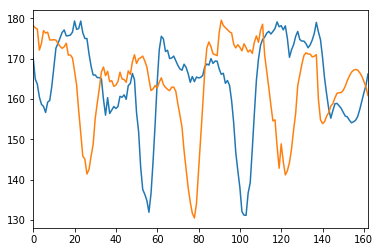

In [18]:

#show knee graph
rawData['theta_leftknee'].plot()
rawData['theta_rightknee'].plot()
plt.show()

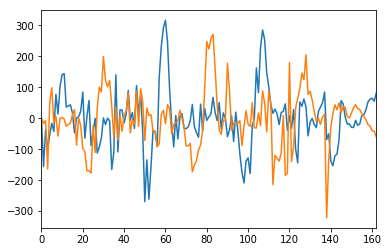

In [21]:
#Make Angle velocity of knee

##left knee
velocity_knee_left =  (rawData['theta_leftknee'][1:].to_numpy() - rawData['theta_leftknee'][:-1].to_numpy()) / (rawData['time'][1:].to_numpy() - rawData['time'][:-1].to_numpy())
velocity_knee_left = np.insert(velocity_knee_left,0,0) #insert '0' to array[0]
rawData["velocity_knee_left"] = velocity_knee_left

##right knee
velocity_knee_right =  (rawData['theta_rightknee'][1:].to_numpy() - rawData['theta_rightknee'][:-1].to_numpy()) / (rawData['time'][1:].to_numpy() - rawData['time'][:-1].to_numpy())
velocity_knee_right = np.insert(velocity_knee_right,0,0) #insert '0' to array[0]
rawData["velocity_knee_right"] = velocity_knee_right

#show graph
rawData["velocity_knee_left"].plot()
rawData["velocity_knee_right"].plot()
plt.show()